In [1]:
import re
import nltk     #text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
#data inspection

In [4]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

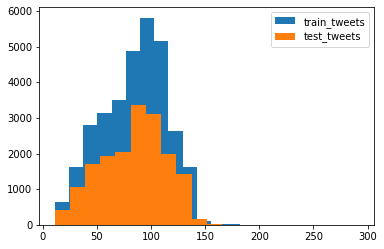

In [8]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [9]:
#data cleaning

In [10]:
combi = train.append(test, ignore_index=True) 
combi.shape

/home/marina.souza/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [12]:
#removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
#removing punctuations, numbers, and special characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [14]:
#removing short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
#text normalization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [18]:
#story generation and visualization from tweets

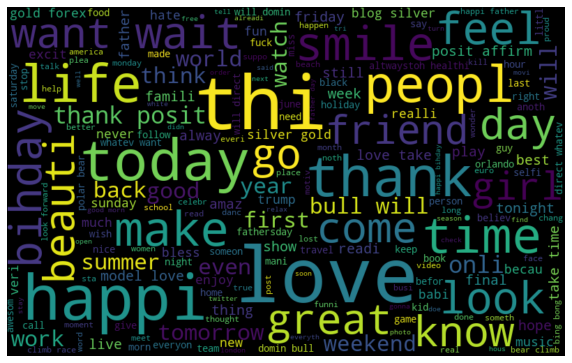

In [19]:
#understanding the common words used in the tweets: WordCloud

all_words = ' '.join([text for text in combi['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

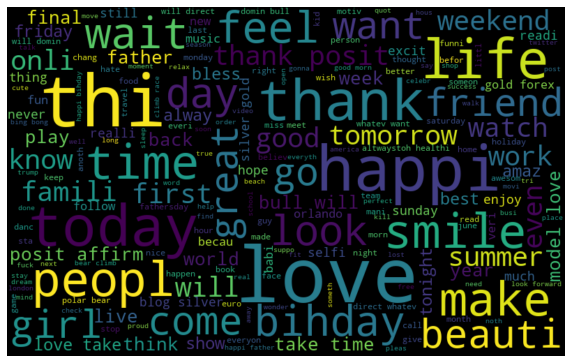

In [20]:
#words in non racist/sexist tweets

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

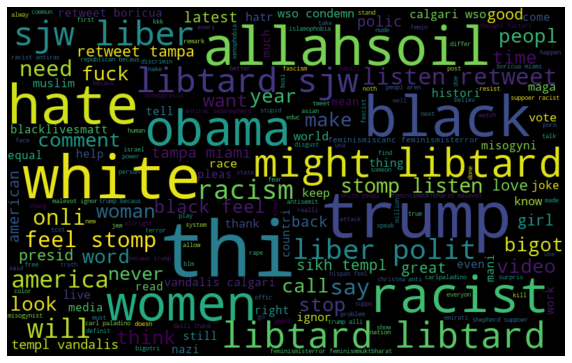

In [21]:
#racist/sexism tweets

negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
#understanding the impact of hashtags on tweets sentiment

#function to collect hashtags
def hashtag_extract(x):
    hashtags = []  
#loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags


#extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
#extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
#unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

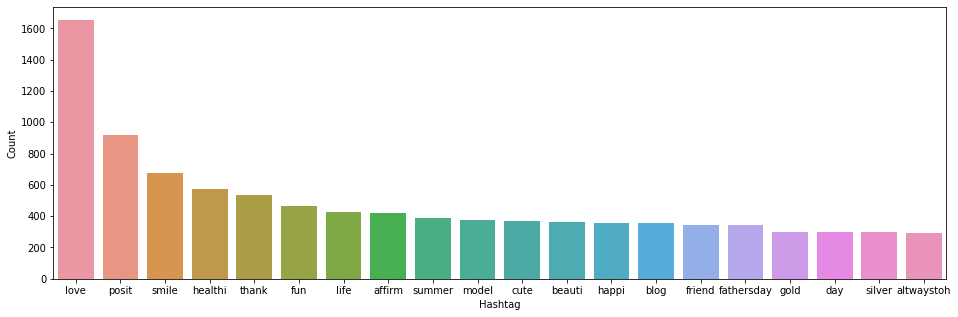

In [23]:
#non-racist/sexist tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 

#selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

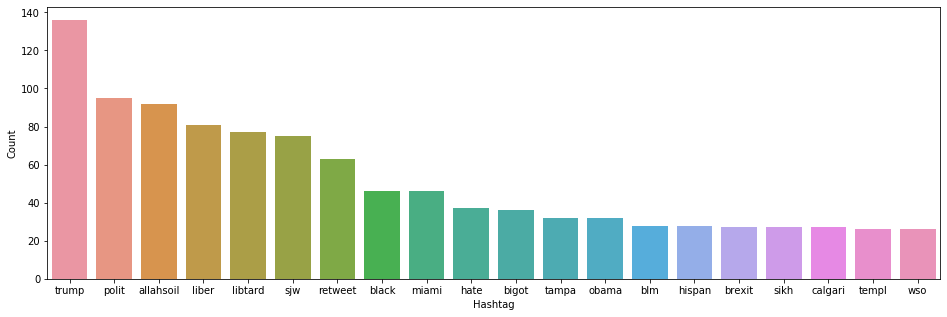

In [24]:
#racist/sexist tweets

b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())}) 

#selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [25]:
#Bag-of-Words Features

In [26]:
conda install -c anaconda gensim

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [28]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [29]:
#TF-IDF Features

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [31]:
#Word2Vec Features

In [32]:
#1. Word2Vec Embeddings

In [98]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

In [99]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510603, 7536020)

In [35]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5623458623886108),
 ('#avocado', 0.5565627813339233),
 ('noodl', 0.5438393354415894),
 ('melani', 0.5423733592033386),
 ('#cellar', 0.5423662066459656),
 ('cookout', 0.5420863032341003),
 ('spinach', 0.5404390096664429),
 ('#bihdaydinn', 0.5403395295143127),
 ('fav', 0.5374093055725098),
 ('#biall', 0.5348941683769226)]

In [36]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5674574971199036),
 ('hillari', 0.5374559164047241),
 ('phoni', 0.5310352444648743),
 ('unstabl', 0.5303878784179688),
 ('#delegaterevolt', 0.5290056467056274),
 ('unfit', 0.5261870622634888),
 ('potu', 0.5176141858100891),
 ('unfavor', 0.5155662298202515),
 ('jibe', 0.5137045383453369),
 ('melo', 0.5109853148460388)]

In [37]:
model_w2v['food']

array([ 2.70653725e-01, -1.64967522e-01,  2.40994424e-01,  1.24475791e-05,
        5.86559288e-02,  5.61970696e-02,  5.97453713e-02, -2.23335311e-01,
       -4.63280976e-01,  3.63357097e-01, -2.40368173e-01,  2.54322708e-01,
       -9.22302306e-01, -1.88173786e-01, -1.62658289e-01, -1.15433276e-01,
       -4.17012006e-01, -8.70606489e-03, -4.63639021e-01, -2.48698458e-01,
        4.06563133e-01, -2.24320441e-01, -9.38568916e-03,  5.45268118e-01,
       -3.14043492e-01,  1.25594258e-01, -7.53679335e-01,  2.02384055e-01,
        3.71435225e-01,  2.77825624e-01, -5.25546074e-01, -8.90417472e-02,
       -1.33702442e-01,  4.44110215e-01, -9.99882519e-01, -7.35118389e-01,
       -1.96661755e-01, -4.72139537e-01, -3.00459862e-01,  8.38479340e-01,
        4.41587567e-01,  6.85569763e-01,  9.81825471e-01,  3.61217231e-01,
        3.51480991e-01, -1.20097786e-01,  2.08666518e-01,  3.86492491e-01,
        1.62978292e-01,  2.16040462e-01, -5.88407069e-02,  6.09960437e-01,
        1.74180359e-01, -

In [38]:
len(model_w2v['food'])

200

In [100]:
#Preparing Vectors for Tweets

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     continue
            if count != 0:
                vec /= count
    return vec

In [101]:
#Preparing word2vec feature set

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [103]:
wordvec_df.shape

(49159, 200)

In [42]:
#2. Doc2Vec Embedding

In [43]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

/home/marina.souza/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [44]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [45]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [46]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [47]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
#dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
#min_count=5, # Ignores all words with total frequency lower than 2
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23)

/home/marina.souza/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [48]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 2330832.69it/s]


In [104]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

In [105]:
#logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [107]:
#Bag-of-Words Features

In [ ]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],                                                            random_state=42,                                                           test_size=0.3)

In [ ]:
lreg = LogisticRegression()
# training the model
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

In [55]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [56]:
#TF-IDF Features

In [57]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5446507515473032

In [58]:
#Word2Vec Features

In [59]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5852869846402587

In [60]:
#doc2vec

In [61]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/home/marina.souza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3690165361183637

In [62]:
#Support Vector Machine (SVM)

In [63]:
from sklearn import svm

In [64]:
#Bag-of-Words Features

In [65]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5097674418604652

In [66]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [67]:
# TF-IDF Features

In [68]:
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5109489051094891

In [69]:
# Word2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1,
              probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

In [ ]:
#Doc2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, 
              probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

In [73]:
#RandomForest

In [74]:
#Bag-of-Words Features

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

0.5529225908372828

In [77]:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [78]:
#TF-IDF Features

In [79]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.562152133580705

In [80]:
#Word2Vec Features

In [81]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.48518111964873767

In [82]:
#Doc2Vec Features

In [83]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.056737588652482275

In [84]:
#XGBoost

In [85]:
conda install -c conda-forge xgboost

Solving environment: - 
  - anaconda/linux-64::ca-certificates-2019.8.28-0, anaconda/linux-64::certifi-2019.9.11-py37_0, anaconda/linux-64::conda-4.8.1-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_2
  - anaconda/linux-64::ca-certificates-2019.8.28-0, anaconda/linux-64::certifi-2019.9.11-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_2, defaults/linux-64::conda-4.8.1-py37_0
  - anaconda/linux-64::certifi-2019.9.11-py37_0, anaconda/linux-64::conda-4.8.1-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_2, defaults/linux-64::ca-certificates-2019.8.28-0
  - anaconda/linux-64::certifi-2019.9.11-py37_0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_2, defaults/linux-64::ca-certificates-2019.8.28-0, defaults/linux-64::conda-4.8.1-py37_0
  - anaconda/linux-64::certifi-2019.9.11-py37_0, anaconda/linux-64::conda-4.8.1-py37_0, defaults/linux-64::ca-certificates-2019.8.28-0, defaults/linux-64::openssl-1.1.1d-h7b6447c_2
  - anaconda/linux-64::certifi-2019.9.11-py37_0, defaults/linux-64::ca-

In [86]:
from xgboost import XGBClassifier

In [87]:
#Bag-of-Words Features

In [88]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5130687318489837

In [89]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [90]:
#TF-IDF Features

In [91]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5185891325071497

In [92]:
#Word2Vec Features

In [93]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6203703703703703

In [94]:
#Doc2Vec Features

In [95]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.35254237288135587

In [96]:
#finetuning xgboost + word2vec

In [97]:
import xgboost as xgb

In [111]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

/home/marina.souza/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [112]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
    
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6450176 for 45 rounds
Best params: 9, 7, F1 Score: 0.6450176


/home/marina.souza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [113]:
params['max_depth'] = 8 
params['min_child_weight'] = 6

In [116]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]

max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


/home/marina.souza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6161706 for 23 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6161706 for 23 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6161706 for 23 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6161706 for 23 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6161706 for 23 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6292612 for 31 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6292612 for 31 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6292612 for 31 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6292612 for 31 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6292612 for 31 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.649526 for 42 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.649526 for 42 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.649526 for 42 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.649526 for 42 rounds
CV with subsample=0.7, colsample=0.9
	F1 Score 

In [117]:
params['subsample'] = .9 
params['colsample_bytree'] = .5

In [ ]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
        
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

In [119]:
params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 8,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [120]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.062676	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.056732	Validation-f1_score:0.133165
[2]	Validation-error:0.056836	Validation-f1_score:0.133165
[3]	Validation-error:0.055793	Validation-f1_score:0.133165
[4]	Validation-error:0.056106	Validation-f1_score:0.133165
[5]	Validation-error:0.055689	Validation-f1_score:0.133165
[6]	Validation-error:0.055793	Validation-f1_score:0.133165
[7]	Validation-error:0.054855	Validation-f1_score:0.133165
[8]	Validation-error:0.055063	Validation-f1_score:0.133165
[9]	Validation-error:0.054125	Validation-f1_score:0.133165
[10]	Validation-error:0.055272	Validation-f1_score:0.133165
Stopping. Best iteration:
[0]	Validation-error:0.062676	Validation-f1_score:0.133165



In [121]:
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.3).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)